In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.lines import Line2D
from datetime import datetime
from cartopy import crs as ccrs

In [2]:
def read_data(root_folder,csv_file):
    df = pd.read_csv(f'{root_folder}/csv/{csv_file}') 
    df = df[df['on_ground'] == False] #Excluding Taxiing Aircraft
    df['x_speed'] = np.sin(np.deg2rad(df['true_track']))*df['velocity']
    df['y_speed'] = np.cos(np.deg2rad(df['true_track']))*df['velocity']
    airspace_state = [(x,y,u,v,country) for x,y,u,v,country in zip(df['longitude'],df['latitude'],df['x_speed'],df['y_speed'],df['origin_country'])]
    return airspace_state

In [3]:
# Config For Plotting Various Geolocations
plot_config = { 
    "regions" : {
        "eu": {
            "title":"EU Region",
            "set_extent":[-15,30,35,60],
            "headwidth":10,
            "headaxislength":7,
            "headlength":9,
            "width":0.001,
            "scale":20000,
            "x":0.9955,
            "y":0.0085
        },
        "us": {
            "title":"US Region",
            "set_extent":[-128,-65,22,52], 
            "headwidth":10,            
            "headaxislength":5,
            "headlength":8,
            "width":0.0025,
            "scale":35000,
            "x":0.9955,
            "y":0.0095
        }
    }
}
region_config = plot_config['regions']['us']

In [4]:
def quiver_aircraft(root_folder,airpsace_state,region_config,timestamp):
    # Plotting Positional Data For United States
    title = region_config.get('title')
    datetime_str = datetime.strptime(timestamp,'%Y-%m-%dT%H:%M:%S')
    plt.figure(figsize =(15,9),num=1,clear=True)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.stock_img()
    ax.set_extent(region_config.get('set_extent'), crs=ccrs.PlateCarree())
    ax.set_title(f'OpenSky API | Aircraft Tracking - {title} - {datetime_str}',loc='left', fontsize=10)

    legend_handle = [
        Line2D([0],[0], color='black', lw=3, label='US Aircraft'),
        Line2D([0],[0], color='red', lw=3, label='Non-US Aircraft'),
    ]

    for x, y, u, v,country in airspace_state:
        if country == 'United States':
            color='black'
        else:
            color='red'
        plt.quiver(
            x, y, u, v, 
            transform=ccrs.PlateCarree(), 
            headwidth=region_config.get('headwidth'),
            headaxislength=region_config.get('headaxislength'),
            headlength=region_config.get('headlength'),
            width=region_config.get('width'),
            scale=region_config.get('scale'),
            color=color
        )
    ax.text(
        x=region_config.get('x'),
        y=region_config.get('y'), 
        s='Created by Filip Livancic', 
        transform=ax.transAxes, 
        bbox=dict(facecolor='white',alpha=0.85), 
        va='bottom',
        ha='right', 
        fontsize=9
    )
    ax.legend(handles=legend_handle,loc='upper right', title_fontsize=9,fontsize=8)
    plt.savefig(
        f'{root_folder}/images/us/{timestamp}.png', dpi=150
    )

In [ ]:
# Creating List of Files To Loop Through
date_selection = '2024-04-28'
root_folder = f'{os.path.dirname(sys.path[0])}/data/get_states/{date_selection}'
file_list = []
for csv_file in os.listdir(f'{root_folder}/csv'):
    if '.csv' in csv_file:
        timestamp = csv_file.split('.')[0]
        file_list.append((timestamp,csv_file))

Creating Image from: 2024-04-28T14:01:18.348624.csv
Creating Image from: 2024-04-28T14:02:19.246206.csv
Creating Image from: 2024-04-28T14:35:47.860410.csv
Creating Image from: 2024-04-28T14:44:55.827444.csv
Creating Image from: 2024-04-28T14:00:17.462307.csv
Creating Image from: 2024-04-28T14:06:22.760927.csv
Creating Image from: 2024-04-28T13:48:07.294005.csv
Creating Image from: 2024-04-28T14:21:35.788155.csv
Creating Image from: 2024-04-28T14:15:30.344542.csv
Creating Image from: 2024-04-28T14:24:38.293371.csv
Creating Image from: 2024-04-28T14:33:46.186525.csv
Creating Image from: 2024-04-28T14:22:36.547297.csv
Creating Image from: 2024-04-28T14:56:05.667282.csv
Creating Image from: 2024-04-28T13:53:11.378434.csv
Creating Image from: 2024-04-28T14:10:26.232815.csv
Creating Image from: 2024-04-28T14:51:01.092827.csv
Creating Image from: 2024-04-28T14:43:54.942421.csv
Creating Image from: 2024-04-28T14:19:34.012285.csv
Creating Image from: 2024-04-28T14:18:33.030169.csv
Creating Ima

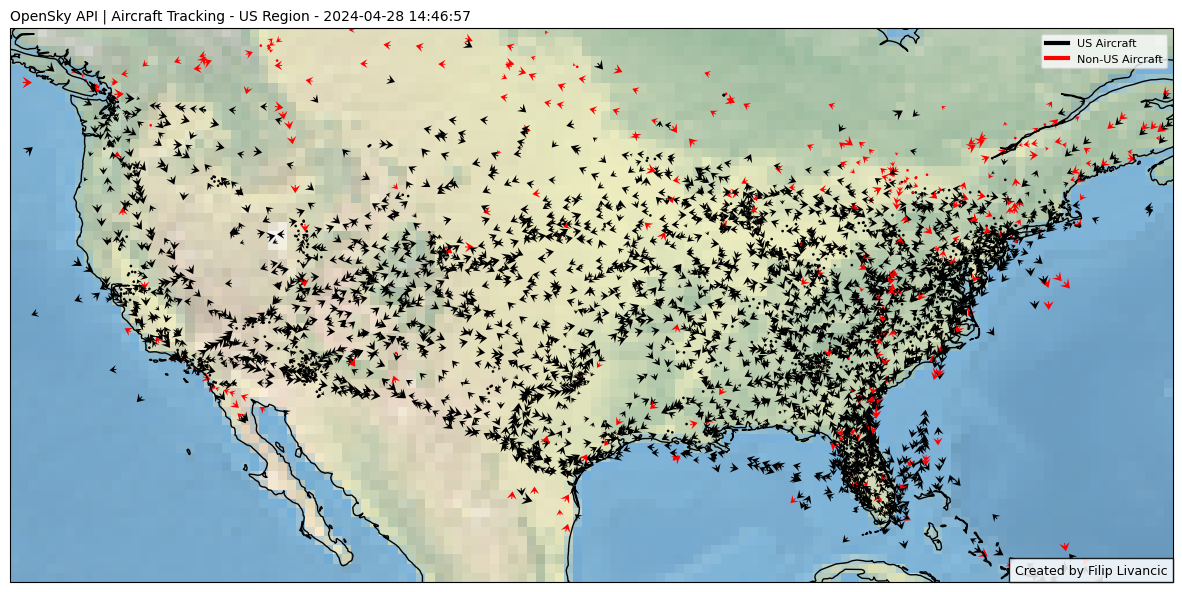

In [ ]:
for obj in file_list:
    timestamp = obj[0]
    csv_file = obj[1]
    print(f'Creating Image from: {csv_file}')
    aircraft = read_data(root_folder,csv_file)
    plot_us_aircraft(root_folder,aircraft,timestamp)